# Twitter US Airline Sentiment Project.


# Contents:
------------------------
-  . <a href = #link100>Context:</a>
- 1. <a href = #link1>Importing Libraries</a>
- 2. <a href = #link2>Reading and Review of the dataset.</a>
- 3. <a href = #link3>Transposing index and columns</a>
- 4. <a href = #link4>EDA Discriptive Observations</a>
- 5. <a href = #link5>Text pre-processing: Data preparation.</a>
- 6. <a href = #link6>HTML tag removal.</a>
- 7. <a href = #link7>Tokenization.</a>
- 8. <a href = #link8>Removing Numbers.</a>
- 9. <a href = #link9>Removing All Special Characters.</a>
- 10. <a href = #link10>Convertion to Lowercasing.</a>
- 11. <a href = #link11>Lemmatization</a>
- 12. <a href = #link12>CountVectorizer.</a>
- 13. <a href = #link13>TfidfVectorizer.</a>
- 14. <a href = #link14>Building The Model.</a>
- 15. <a href = #link15>Conclusion.</a>
- 16. <a href = #link16>References & GitHub Link.</a>
    

# <a id='link100'> Context:</a>

# Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from 
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed 
by categorizing negative reasons (such as "late flight" or "rude service").
Dataset:
 
The project is from a dataset from Kaggle.
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
The dataset has to be downloaded from the above Kaggle website.
The dataset has the following column

* tweet_id
* airline_sentiment
* airline_sentiment_confidence
* negativereason
* negativereason_confidence
* airline
* airline_sentiment_gold
* name
* negativereason_gold
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location
* user_timezone

* **Objective:**
To implement the techniques learnt as a part of the course.
* Learning Outcomes:
* Basic understanding of text pre-processing.
* What to do after text pre-processing: 
    o Bag of words
    o Tf-idf
* Build the classification model.
* Evaluate the Model.

**Steps and tasks:**
1. Import the libraries, load dataset, print shape of data, data description. 
2. Understand of data-columns: 
a. Drop all other columns except “text” and “airline_sentiment”
b. Check the shape of data.
c. Print first 5 rows of data.
3. Text pre-processing: Data preparation. 
a. Html tag removal.
b. Tokenization.
c. Remove the numbers.
d. Removal of Special Characters and Punctuations.
e. Conversion to lowercase.
f. Lemmatize or stemming.
g. Join the words in the list to convert back to text string in the dataframe. (So that each row 
contains the data in text format.)
h. Print first 5 rows of data after pre-processing.
4. Vectorization: 
a. Use CountVectorizer.
b. Use TfidfVectorizer.
5. Fit and evaluate model using both type of vectorization. (6+6 Marks)
6. Summarize your understanding of the application of Various Pre-processing and Vectorization and 
performance of your model on this dataset. 


# <a id='link1'> Importing Libraries</a>

In [1]:
# Standard packages

import numpy as np
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# <a id='link2'> Reading and Review of the dataset.</a>

In [2]:
tweet = pd.read_csv('Tweets.csv').copy()
tweet.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
tweet['airline_sentiment']

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

# <a id='link3'> Transposing index and columns.</a>

In [7]:
print('Shape of the dataframe is',tweet.shape)
print('The number of nulls in each column are \n', tweet.isna().sum())

Shape of the dataframe is (14640, 15)
The number of nulls in each column are 
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


## we’ve got 14,640 samples (tweets), each with 15 features.

In [8]:
tweet.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [9]:
tweet.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [10]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [11]:
# The following line of code to view the dataset data types.
tweet.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [12]:
tweet.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [13]:
# Print dataset numerical variables.
num_var=list(tweet.select_dtypes(exclude='object').columns)
tweet[num_var]

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
0,570306133677760513,1.0000,NaN,0
1,570301130888122368,0.3486,0.0000,0
2,570301083672813571,0.6837,NaN,0
3,570301031407624196,1.0000,0.7033,0
4,570300817074462722,1.0000,1.0000,0
...,...,...,...,...
14635,569587686496825344,0.3487,0.0000,0
14636,569587371693355008,1.0000,1.0000,0
14637,569587242672398336,1.0000,NaN,0
14638,569587188687634433,1.0000,0.6659,0


## Checking for error, duplicates and missing vales.

In [14]:
# Check the data
tweet.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [15]:
print('Percentage null or na values in tweet')
((tweet.isnull() | tweet.isna()).sum() * 100 / tweet.index.size).round(2)

Percentage null or na values in tweet


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

tweet_coord , airline_sentiment_gold, negativereason_gold have more than 90% missing data. It will be better to delete these columns as they will not provide any constructive information

In [16]:
# The following code to check duplicates in the datasets.
dupes = tweet.duplicated()
sum(dupes)

36

In [17]:
#dupes.value_counts
dupes.value_counts().head()

False    14604
True        36
dtype: int64

# <a id='link4'>EDA Discriptive Observations.</a>

In [18]:
# Printing dataset columns for numerical values.
tweet.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


# Tweet sentiment by airline.
Following the figure, we analyze how people tweet & retweet about different airlines. From to bottom, we will show the numbers of tweets for each airline & sentiment, and the number of retweets for each airline & sentiment, and the ratio of retweets to tweets for each airline and sentiment that is colored with different colors to respectively represents negative, neutral, or positive sentiments

Text(0, 0.5, 'No. of Tweets')

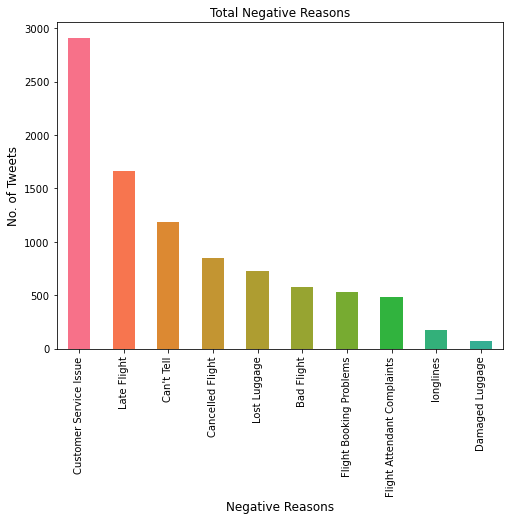

In [19]:
# the following line of codes to plot all the negative reasons.
color=sns.color_palette('husl', 20)
pd.Series(tweet['negativereason']).value_counts().plot(kind = 'bar',
                                                      color=color,figsize=(8,6),title = 'Total Negative Reasons')
plt.xlabel('Negative Reasons', fontsize=12)
plt.ylabel('No. of Tweets', fontsize=12)

In [20]:
#Counting the total number of negative reasons
tweet.negativereason.value_counts().head(10)

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

<AxesSubplot:title={'center':'Total Tweets For Each Sentiment'}, ylabel='airline_sentiment'>

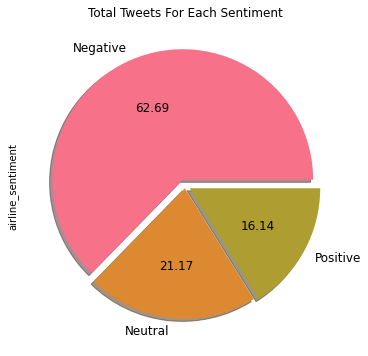

In [21]:
colors=sns.color_palette('husl', 10)
pd.Series(tweet['airline_sentiment']).value_counts().plot(kind='pie', colors=colors,
    labels=['Negative', 'Neutral', 'Positive'],explode=[0.05,0.02,0.04],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = 'Total Tweets For Each Sentiment')

In [22]:
# The following line of codes to filter the categary.
is_positive = tweet['airline_sentiment'].str.contains('positive')
is_negative = tweet['airline_sentiment'].str.contains('negative')
is_neutral = tweet['airline_sentiment'].str.contains('neutral')
positive_tweets = tweet[is_positive]
positive_tweets.shape

(2363, 15)

In [23]:
negative_tweets = tweet[is_negative]
negative_tweets.shape

(9178, 15)

In [24]:
neutral_tweets = tweet[is_neutral]
neutral_tweets.shape

(3099, 15)

In [25]:
worst_airline = negative_tweets[['airline','airline_sentiment_confidence','negativereason']]
worst_airline

,airline,airline_sentiment_confidence,negativereason
3,Virgin America,1.0000,Bad Flight
4,Virgin America,1.0000,Can't Tell
5,Virgin America,1.0000,Can't Tell
15,Virgin America,0.6842,Late Flight
17,Virgin America,1.0000,Bad Flight
...,...,...,...
14631,American,1.0000,Bad Flight
14633,American,1.0000,Cancelled Flight
14634,American,0.6684,Late Flight
14636,American,1.0000,Customer Service Issue


In [26]:
# Following line of codes to present airline sentiment in digits 0 = to negative 1 = to positive.
tweet['sentiment']=tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
tweet.sentiment.head()

0    1
1    1
2    1
3    0
4    0
Name: sentiment, dtype: int64

In [27]:
# The following line of codes to create the rank for the worst airline.
cnt_worst_airline = worst_airline.groupby('airline', as_index=False).count()
cnt_worst_airline.sort_values('negativereason', ascending=False)

,airline,airline_sentiment_confidence,negativereason
4,United,2633,2633
3,US Airways,2263,2263
0,American,1960,1960
2,Southwest,1186,1186
1,Delta,955,955
5,Virgin America,181,181


In [28]:
# The following line of codes to create the rank for the best airline.
best_airline = positive_tweets[['airline','airline_sentiment_confidence']]
cnt_best_airline = best_airline.groupby('airline', as_index=False).count()
cnt_best_airline.sort_values('airline_sentiment_confidence', ascending=False)

,airline,airline_sentiment_confidence
2,Southwest,570
1,Delta,544
4,United,492
0,American,336
3,US Airways,269
5,Virgin America,152


In [29]:
# The following line of codes create the rank for negative reason.
motivation = negative_tweets[['airline','negativereason']]
cnt_bad_flight_motivation = motivation.groupby('negativereason', as_index=False).count()
cnt_bad_flight_motivation.sort_values('negativereason', ascending=False)

,negativereason,airline
9,longlines,178
8,Lost Luggage,724
7,Late Flight,1665
6,Flight Booking Problems,529
5,Flight Attendant Complaints,481
4,Damaged Luggage,74
3,Customer Service Issue,2910
2,Cancelled Flight,847
1,Can't Tell,1190
0,Bad Flight,580


<AxesSubplot:title={'center':'Top 5 Negative Reasons'}, ylabel='negativereason'>

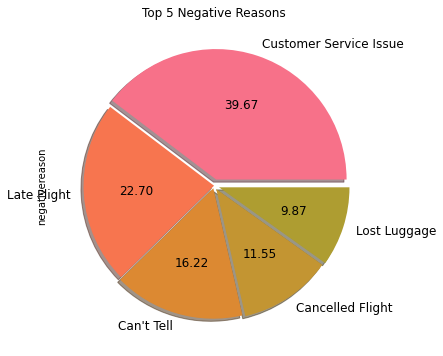

In [30]:
# The following line of code to print top 5 niegative reasons.
pd.Series(tweet["negativereason"]).value_counts().head(5).plot(kind="pie",
                labels=["Customer Service Issue", "Late Flight", "Can't Tell","Cancelled Flight","Lost Luggage"],
                colors=color,autopct='%.2f',explode=[0.05,0,0.02,0.03,0.04],shadow=True,
                fontsize=12,figsize=(6, 6),title="Top 5 Negative Reasons")

In [31]:
air_sent=pd.crosstab(tweet.airline, tweet.airline_sentiment)
air_sent

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


<AxesSubplot:title={'center':'Airline Sentiment'}, xlabel='airline'>

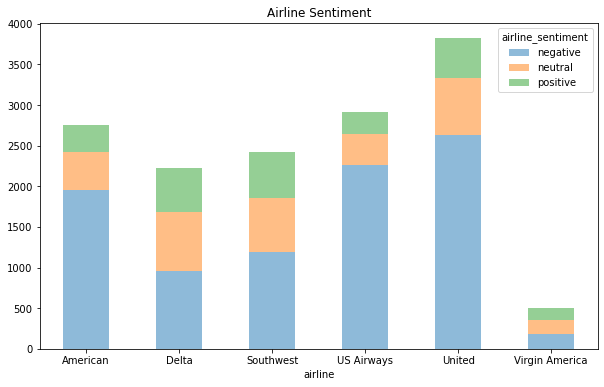

In [32]:
pd.crosstab(index = tweet["airline"],columns = tweet["airline_sentiment"]).plot(kind='bar',
                figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment")

# Observation.
The majority of customers don't like most of the airline except Virgin America. United Airlines is clearly indicating the most reviled of all airlines. Interestingly, the retweet's efficiency is airline-dependent.
Tweets about the united airline, America, and Us airways are more likely to be retweeted if they are negative, while tweets about the Southwest airline, delta airline, and Virgin America airline are more likely to be retweeted if they are positive.
This general trend anecdotally reflects the author's personal opinion of the airline quality, we speculate that Twitter users are retweeting comments that they personally agree with.
Consequently, I think that the retweet's efficiency could be a useful metric for determining public opinion.

### Following lines of codes to plot airline sentiments for each airline.
* will calculate the total number of tweets for each airline.
* will plot bar plots for each airline with respect to sentiments of tweets, (Positive-Negative or-Neutral). This will clearly suggest the airline sentiment and airline relationships.

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


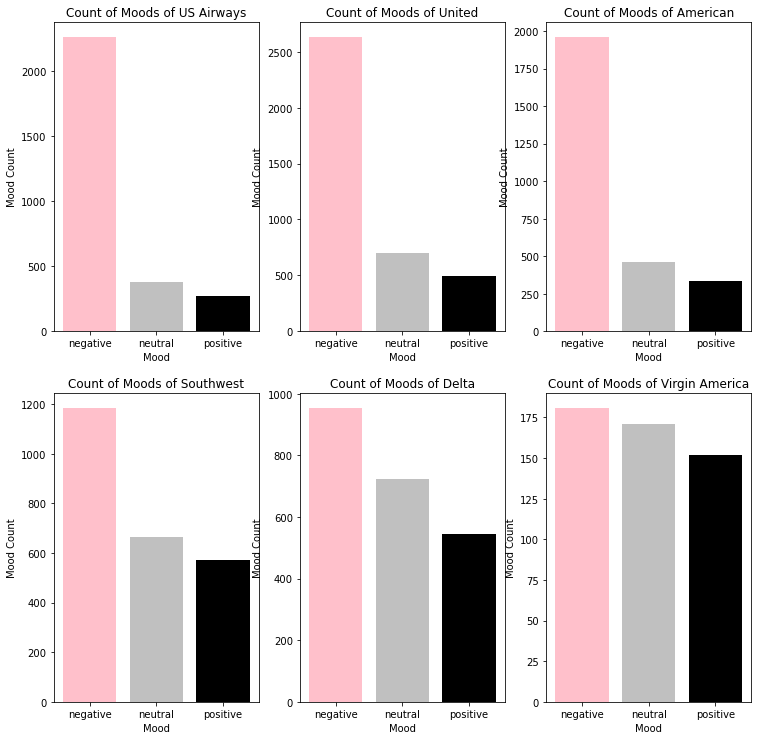

In [33]:
print("Total number of tweets for each airline \n ",tweet.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12.5, 12.5))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=tweet[tweet['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['pink', 'silver', 'black'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

# Observation.
* Tweets for VirginAmerica are the most balanced.
* United airline, US Airways and American are substantially get negative tweets.
* The majority airlines having negative tweets either neetral or positive tweets
* Virgin America having the most balanced spread of positive, neutral and negative of all US airlines.



### Checking if there is any relationship between negative sentiments and date?
the dataset has dates from 2015/02/17  to  2015/02/24.

interesting to see if the date has any impact on sentiments of customers tweets here the focus will be on the negative ones eventually we can be able to draw various conclusions by visualizing this

In [34]:
date = tweet.reset_index()
# Converting the date column to pandas datetime.
date.tweet_created = pd.to_datetime(date.tweet_created)
# Replacing the dates in the data column to only the date and no time stamp using the 'dt,date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
day_df.head(20)

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                               positive              69
               Southwest       negative             213
                               neutral               85
                               positive              86
               US Airways      negative             233
                               neutral               30
                               positive              48
               United          negative             272
                               neutral               75
                               positive              49
               Virgin America  negative              12
                               neutral               21

<function matplotlib.pyplot.show(close=None, block=None)>

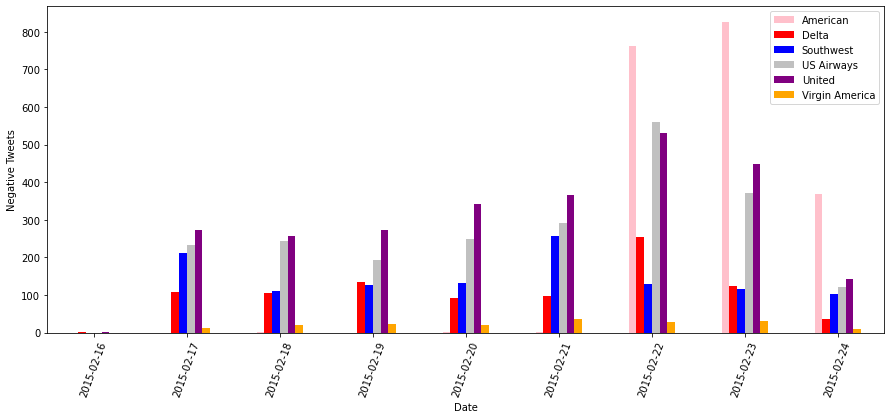

In [35]:
# The following lines of codes to plot customers sentiments based on dates.
day_df = day_df.loc(axis=0)[:,:,'negative']
#Groupby & plot sentiments based on dates.
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['pink', 'red', 'blue','silver','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show

# Observation.
* Interestingly, American has a sudden upsurge in negative sentimental tweets on 2015-02-23, which reduced to half the very next day 2015-02-24. (I hope American is doing better these days and resolved their Customer Service Issue as we saw before)
* Virgin America has the least number of negative tweets throughout the weekly data that we have. It should be noted that the total number of tweets for Virgin America was also significantly less as compared to the rest airlines, and hence the least negative tweets.
* The negative tweets for all the rest airlines is slightly skewed towards the end of the week !

# Preprocessing.

In [3]:
import contractions
import re, string, unicodedata
from bs4 import BeautifulSoup                 # Beautiful soup is a parsing library that can use different parsers.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer

# <a id='link5'> Text pre-processing: Data preparation.</a>

## Droping DataSet Columns.

In [4]:
# Here we are going to deal with text data, so we seperate out the text column in a new dataframe: data
tweets = tweet.drop(['tweet_id','airline_sentiment_confidence',
       'negativereason','negativereason_confidence','airline',
       'airline_sentiment_gold','name','negativereason_gold',
       'retweet_count','tweet_coord','tweet_created',
       'tweet_location','user_timezone'], axis=1)

In [5]:
#List of all special characters that are to be removed.
special_chars = ["!",'"',"%","&","amp","'","(",")", "*","+",",","-",".",
                 "/",":",";","<","=",">","?","[","\\","]","^","_",
                 "`","{","|","}","~","–","@","#","$"]

In [6]:
for c in special_chars:
    tweets['text'] = tweets['text'].str.replace(c,'') # Removing all special characters from all the tweets

In [7]:
tweets.shape

(14640, 2)

In [8]:
# Will use only airline_sentiment & 'text' columns from the dataset, as these are useful for analysis.
tweets = tweets.loc[:14640, ['airline_sentiment', 'text']]

In [9]:
tweets.isnull().sum(axis=0)   

airline_sentiment    0
text                 0
dtype: int64

In [10]:
pd.set_option('display.max_colwidth', None) #Display full dataframe information (Non.turrncated text column.)
tweets.head() # Print first 5 rows of the dataset.

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus youve added commercials to the experience tacky
2,neutral,VirginAmerica I didnt today Must mean I need to take another trip
3,negative,VirginAmerica its really aggressive to blast obnoxious entertainment in your guests faces they have little recourse
4,negative,VirginAmerica and its a really big bad thing about it


In [11]:
tweets.shape 

(14640, 2)

# <a id='link6'>HTML tag removal.</a>

In [12]:
def strip_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()
tweets['text'] = tweets['text'].apply(lambda x: strip_html(x))
tweets.head()

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus youve added commercials to the experience tacky
2,neutral,VirginAmerica I didnt today Must mean I need to take another trip
3,negative,VirginAmerica its really aggressive to blast obnoxious entertainment in your guests faces they have little recourse
4,negative,VirginAmerica and its a really big bad thing about it


# Replace Contractions.

In [13]:
def replace_contractions(text):
    """Replace contraction in string of text"""
    return contractions.fix(text)

tweets['text'] = tweets['text'].apply(lambda x: replace_contractions(x))
tweets.head()

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus you have added commercials to the experience tacky
2,neutral,VirginAmerica I did not today Must mean I need to take another trip
3,negative,VirginAmerica its really aggressive to blast obnoxious entertainment in your guests faces they have little recourse
4,negative,VirginAmerica and its a really big bad thing about it


# <a id='link8'>Removing Numbers.</a>

In [14]:
def remove_numbers(text):
    text = re.sub(r'\d', "", text)
    return text

tweets['text'] = tweets['text'].apply(lambda x: remove_numbers(x))
tweets.head()

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus you have added commercials to the experience tacky
2,neutral,VirginAmerica I did not today Must mean I need to take another trip
3,negative,VirginAmerica its really aggressive to blast obnoxious entertainment in your guests faces they have little recourse
4,negative,VirginAmerica and its a really big bad thing about it


# <a id='link7'>Tokenization.</a>

In [15]:
# Following lines of codes for Tokenization of dataset.
tweets['text'] = tweets.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [16]:
tweets.head() 

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,neutral,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]"
3,negative,"[VirginAmerica, its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,negative,"[VirginAmerica, and, its, a, really, big, bad, thing, about, it]"


In [17]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))      

# <a id='link11'>Lemmatization.</a>
Lemmatization on the surface is very similar to stemming, where the goal is to remove inflections and map a word to its root form.
The only difference is that, lemmatization tries to do it the proper way.
It doesn’t just chop things off, it actually transforms words to the actual root. For example, the word “better” would map to “good”.

# <a id='link9'>Removing All Special Characters.</a>

In [18]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words


# <a id='link10'>Convertion to Lowercasing.</a>
* Lowercasing all text data. is one of the simplest and most effiective form of text preprocessing it is applicable to most text mining and NLP problems.


In [19]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# <a id='link9'>Removing Punctuation.</a>

In [20]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', "", word)
        if new_word != "":
            new_words.append(new_word)
    return new_words

# Stopword Removal.
Stop words are a set of commonly used words in a language.
Examples of stop words in English are “a”, “the”, “is”, “are” and etc. The intuition behind using stop words is that, by removing low information words from text, we can focus on the important words instead.

In [21]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# Lemmatize List.

In [22]:
def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

# Normalize & Joining Words.

In [23]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

# Bellow will execute the above functions:

### will define a new function normalize, which processes all the steps together.

In [24]:
tweets['text'] = tweets.apply(lambda row: normalize(row['text']), axis=1)
tweets.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica not today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


# <a id='link12'>CountVectorizer.</a>

CountVectorizer converts a collection of text documents to a matrix of token counts, the occurrences of tokens in each document. This implementation produces a sparse a sparse representation of counts.

In [25]:
# The following lines of codes for vectorization (Convert of text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000) # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(tweets['text'])

data_features = data_features.toarray()

In [26]:
data_features.shape

(14640, 1000)

# Labeling.

In [27]:
labels = tweets['airline_sentiment']
labels = labels.astype('str')

# Data Spliting into train & test.

In [28]:
# Following lines of codes to split data into train & test.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

# <a id='link14'>Building The Model.</a>

In [29]:
# Following line of codes using Random Forest to build model for the classification,
#of tweets reviews, also calculating the CV score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# Using Random forest to build model for the classification. 
rforest = RandomForestClassifier(n_estimators=10, n_jobs=4)
#Fitting the model
rforest = rforest.fit(x_train, y_train)

print(rforest)

print(np.mean(cross_val_score(rforest, data_features, labels, cv=10)))


RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7102459016393443


In [30]:
# folloing line of codes predict the result for test data using the model built above.

result = rforest.predict(x_test)

# Print & Plot Confusion Matrix.

[[2483  255   76]
 [ 373  433   78]
 [ 174  116  404]]


<AxesSubplot:>

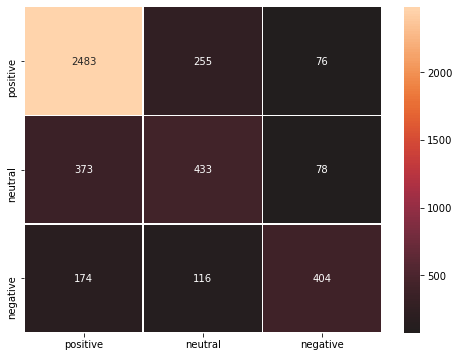

In [42]:
# following lines of codes to print and plot Confusion matirx to get an idea of how the
# distribution of the prediction is, among all the classes.

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index= ['positive','neutral','negative'],
                    columns= ['positive','neutral','negative'])
plt.figure(figsize= (8,6))
sns.heatmap(df_cm, annot=True, linewidths=.5, fmt= 'd', center = 1)

In [43]:
print('======== Classification Matrix ========')
print(confusion_matrix(x_test.argmax(axis=1), x_test.argmax(axis=1)))

======== Classification Matrix ========
[[62  0  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  0]
 [ 0  0  5 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


# <a id='link13'>TfidfVectorizer.</a>

In [44]:
# Folloing line of codes using TfidfVectorizer to convert test data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(tweets['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 1000)

# Using Random Forest To Build Model.

In [45]:
# following lines of codes to print and plot Classification of reviews,
#and to calculate the CV score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# Using Random forest to build model for the classification. 
rforest = RandomForestClassifier(n_estimators=10, n_jobs=4)
# Fitting The model.
rforest = rforest.fit(x_train, y_train)

print(rforest)

print(np.mean(cross_val_score(rforest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7117486338797815


In [46]:
result = rforest.predict(x_test)

<AxesSubplot:>

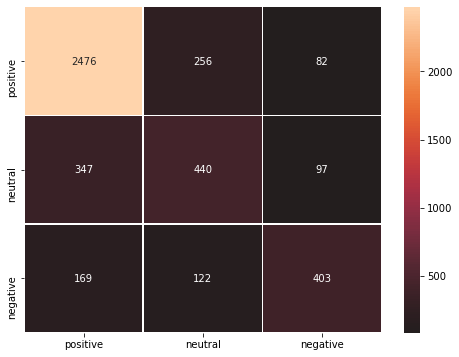

In [47]:
# Following lines of code to plot the confusion mat.

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index= ['positive','neutral','negative'],
                    columns= ['positive','neutral','negative'])
plt.figure(figsize= (8,6))
sns.heatmap(df_cm, annot=True, linewidths=.5, fmt= 'd', center = 1)

# SentimentIntensityAnalyzer.

In beloow we use TexBlob for that has a the sentiment function from the TextBlob library help to give the polarity range between -1 to 0 it indicates negative sentiment, and 0 to 1 is indicated to a positive sentiment if you get polarity close to 1 it indicates highly positive sentiment

In [73]:
from textblob import TextBlob
text=TextBlob('virginamerica really aggressive blast obnoxious entertainment guests face little recourse.')
print(text.sentiment)

Sentiment(polarity=0.0062500000000000056, subjectivity=0.35)


In [75]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
text=SentimentIntensityAnalyzer()
score=text.polarity_scores("virginamerica really aggressive blast obnoxious entertainment guests face little recourse.")
print(score)

{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'compound': -0.3306}


# <a id='link15'>Conclusion.</a>

The most important reason for the bad flight is due to customer service not so good for the companies..Hence US airline, United, and American airlines have received the highest proportion of negative feedback. in spite, Virgin America did not get tweeted about much among most airlines, note to mention poor customer service has been complained about, except Delta airline, where delayed flights are the leading cause of negative feedback .words like (Thanks-best-customer-love-flying-good), are understandably present in the most frequent words of positive tweets. However other than these, most of the words are stop words and need to be filtered.

* We used a dataset that has reviews in text format and their sentiment score on a scale of 1 to 5.
* The goal was to build a model for text-classification.
* We pre-processed the data using various techniques & Algorithms.
* The pre-processed phase is to prepare the data and convert it to numbers, so we will be able to input the data into the model.
* After building the classification model, will predict the result for test data.
* After using the all above-mentioned techniques, our model performed very well with a score of 70% in the perspective of how the text classification models perform.
* We can tune to improve the accuracy of the model. another way to increase accuracy is to use different variations of Pre-processing techniques.

**Learning Objectives**
In this case study we've learn how the Text pre-processing: Data preparation.

* Html tag removal. 
* Tokenization. 
* Remove the numbers. 
* Removal of Special Characters and Punctuations. 
* Conversion to lowercase. 
* Lemmatize or stemming.
* Join the words in the list to convert back to text string in the dataframe. 
* Print first 5 rows of data after pre-processing.
* CountVectorizer. 
* Use TfidfVectorizer.
* Using Random Forest to build a classification model.

# <a id='link16'>References & GitHub Link.</a>

* https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.YD3SCE7ivIU
* https://medium.com/@wenxuan0923/feature-extraction-from-text-using-countvectorizer-tfidfvectorizer-9f74f38f86cc
* https://datatofish.com/convert-string-to-float-dataframe/
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
* https://towardsdatascience.com/how-to-label-text-for-sentiment-analysis-good-practises-2dce9e470708
* https://medium.com/@limavallantin/dealing-with-data-preprocessing-problems-b9c971b6fb40
* https://medium.com/@limavallantin/why-is-removing-stop-words-not-always-a-good-idea-c8d35bd77214

* https://github.com/command20/This-repository-records-all-the-project-works-that-I-did-in-my-PGP-AIML-program-with-UT-Austin-and-G